In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
with open('RU_category_id.json', 'r') as f:
    categories = json.load(f)

categories = {int(item.get('id')): item.get('snippet').get('title') for item in categories.get('items') }
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [18]:
videos = pd.read_csv('RUvideos.csv') # , engine='python', encoding='utf-8'
videos = videos.drop(columns=['video_id', 'title', 'channel_title', 'tags', 
                              'thumbnail_link', 'comments_disabled', 'ratings_disabled',
                              'video_error_or_removed', 'description'])

videos_filtred = videos[videos['category_id'].map(lambda c: c in categories)]
# print(videos_filtred)
print(videos_filtred.info(), end='\n\n\n')
print(type(videos_filtred['publish_time'].iloc[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39198 entries, 0 to 40737
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   trending_date  39198 non-null  object
 1   category_id    39198 non-null  int64 
 2   publish_time   39198 non-null  object
 3   views          39198 non-null  int64 
 4   likes          39198 non-null  int64 
 5   dislikes       39198 non-null  int64 
 6   comment_count  39198 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.4+ MB
None


<class 'str'>


22    0.264044
24    0.151615
25    0.137813
23    0.078193
1     0.077580
26    0.051023
17    0.050207
10    0.048344
2     0.040385
28    0.028905
20    0.026609
27    0.018215
15    0.015409
19    0.006684
43    0.004949
30    0.000026
Name: category_id, dtype: float64

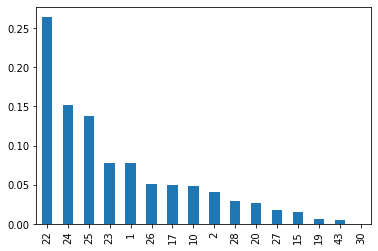

In [39]:
cnt = videos_filtred.category_id.count()
(videos_filtred.category_id.value_counts() / cnt).plot(kind='bar')

# Или более простой способ
cs_probs = videos_filtred['category_id'].value_counts(normalize=True)
cs_probs

/tmp/ipykernel_14366/3746291193.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'People & Blogs'),
 Text(1, 0, 'Entertainment'),
 Text(2, 0, 'Science & Technology'),
 Text(3, 0, 'Comedy'),
 Text(4, 0, 'Education'),
 Text(5, 0, 'Sports'),
 Text(6, 0, 'Autos & Vehicles'),
 Text(7, 0, 'News & Politics'),
 Text(8, 0, 'Pets & Animals'),
 Text(9, 0, 'Gaming'),
 Text(10, 0, 'Film & Animation'),
 Text(11, 0, 'Shows'),
 Text(12, 0, 'Howto & Style'),
 Text(13, 0, 'Music'),
 Text(14, 0, 'Travel & Events'),
 Text(15, 0, 'Movies')]

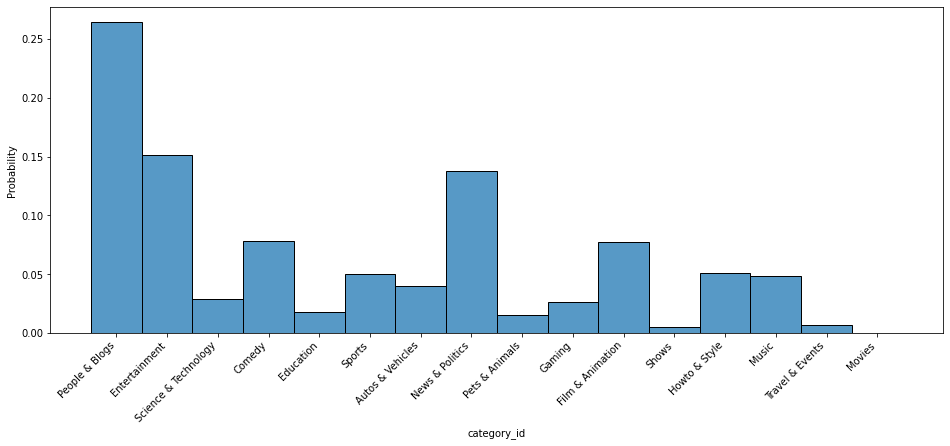

In [6]:
plt.figure(figsize=(16, 6))
g = sns.histplot(videos_filtred['category_id'].transform(lambda c: categories[c]), stat='probability')
plt.draw()
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [13]:
# Эксперимент с датой
d_range = pd.date_range('2022-01-01', periods=5, freq='M')
d_range.month

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [10]:
# Преобразуем publish_time из строки в datetime
publish_time = pd.to_datetime(videos_filtred['publish_time'])
publish_time

0       2017-11-13 09:09:31+00:00
1       2017-11-13 17:32:11+00:00
2       2017-11-13 16:11:31+00:00
3       2017-11-13 06:51:10+00:00
4       2017-11-13 16:52:36+00:00
                   ...           
40733   2018-06-13 15:01:13+00:00
40734   2018-06-13 13:47:01+00:00
40735   2018-06-12 09:38:38+00:00
40736   2018-06-13 12:51:23+00:00
40737   2018-06-13 00:23:33+00:00
Name: publish_time, Length: 39198, dtype: datetime64[ns, UTC]

In [23]:
# Извлечем из publish_time месяц
videos_month = publish_time.dt.month
print(videos_month)

# Альтернативный вариант
videos_month_alt = (pd.to_datetime(videos_filtred['publish_time'])).transform(lambda dt: dt.month)
videos_month_alt

0        11
1        11
2        11
3        11
4        11
         ..
40733     6
40734     6
40735     6
40736     6
40737     6
Name: publish_time, Length: 39198, dtype: int64


0        11
1        11
2        11
3        11
4        11
         ..
40733     6
40734     6
40735     6
40736     6
40737     6
Name: publish_time, Length: 39198, dtype: int64

In [34]:
# Вероятность по месяцам
prob_month = videos_month.value_counts(normalize=True)
prob_month, prob_month.index

(3     0.153375
 12    0.152661
 5     0.150645
 1     0.139012
 2     0.133476
 4     0.118450
 11    0.089520
 6     0.061381
 10    0.000485
 8     0.000485
 9     0.000255
 7     0.000255
 Name: publish_time, dtype: float64,
 Int64Index([3, 12, 5, 1, 2, 4, 11, 6, 10, 8, 9, 7], dtype='int64'))

In [32]:
# Извлечем из publish_time год
videos_year = publish_time.dt.year
prob_year = videos_year.value_counts(normalize=True) #.plot(kind='bar')
prob_year

2018    0.755192
2017    0.244043
2016    0.000383
2015    0.000230
2014    0.000077
2013    0.000026
2012    0.000026
2011    0.000026
Name: publish_time, dtype: float64

#### Вероятность по Бенферрони

In [44]:
# Вероятность p_a - видео не попало в образовательную категорию (27, 28)
p_a = 1 - cs_probs.loc[[27, 28]].sum()

           
# Вероятность p_b попадания в весенний месяц (3, 4, 5)
p_b = prob_month[prob_month.index.isin([3, 4, 5])].sum()

# Пересечение p_a и p_b
p_ab_intersect_lower_bound = p_a + p_b - 1
p_ab_intersect_lower_bound

0.37535078320322457

#### Реальная вероятность

In [54]:
n = len(videos_filtred)
# Используем прим отрицание (~) чтобы взять все категории отличные от [27, 28]
# + нам нужно еще взять отобрать данные только за весенние месяцы [3, 4, 5]
n_a = len(videos_filtred[~videos_filtred['category_id'].isin([27, 28]) & videos_month.isin([3, 4, 5])])

p_a = n_a / n
p_a

0.40405122710342367

##### В данном примере разность между подходом Бонферрони и частотным способом не очень выраженна, но это потому, что в нашем случае вероятности p_a и p_b имели БОЛЬШИЕ значения

In [58]:
# Вероятность попадиния образовательного видео в тренд да еще и в январе по методу Бонферрони
p_c_lower = cs_probs.loc[27] + prob_month.loc[1] - 1
p_c_lower

-0.8427725904382877